# 机器学习练习1_linear regression

## 单变量线性回归

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv( 'https://github.com/kevinzhang0216/Coursera-ML-AndrewNg-Notes/blob/master/code/ex1-linear%20regression/ex1data1.txt', header = None, names =['Population', 'Profit'])

In [4]:
data.head()

,Population,Profit
0,<!DOCTYPE html>,NaN
1,"<html lang=""en"">",NaN
2,<head>,NaN
3,"<meta charset=""utf-8"">",NaN
4,"<link rel=""dns-prefetch"" href=""https://githu...",NaN


In [6]:
data = pd.read_csv( 'ex1data1.txt', header = None, names =['Population', 'Profit'])

In [7]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


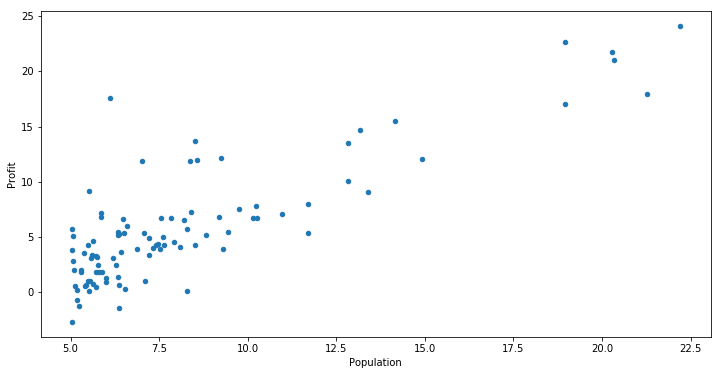

In [13]:
data.plot.scatter( x='Population', y='Profit', figsize = (12, 6))

In [14]:
# DataFrame.insert(loc, column, value, allow_duplicates=False) 
# 增加一列数
data.insert(0, 'ones', 1)

In [15]:
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [16]:
data.shape

(97, 3)

In [20]:
cols = data.shape[1] # 列的行数
X = data.iloc[:,0:cols-1]

In [21]:
X

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
5,1,8.3829
6,1,7.4764
7,1,8.5781
8,1,6.4862
9,1,5.0546


In [22]:
Y = data.iloc[: , cols-1: cols]

In [23]:
Y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
5,11.88600
6,4.34830
7,12.00000
8,6.59870
9,3.81660


In [24]:
X = np.matrix(X.values)

In [25]:
Y = np.matrix(Y.values)

In [30]:
theta = np.matrix(np.array([0,0]))

In [31]:
theta

matrix([[0, 0]])

In [33]:
def computerCost(X, Y, theta):
    inner = np.power(((X * theta.T)-Y), 2)
    return np.sum(inner)/(2*len(X))

In [34]:
computerCost(X, Y, theta)

32.072733877455676

# 梯度下降

In [63]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computerCost(X, y, theta)
    return theta, cost

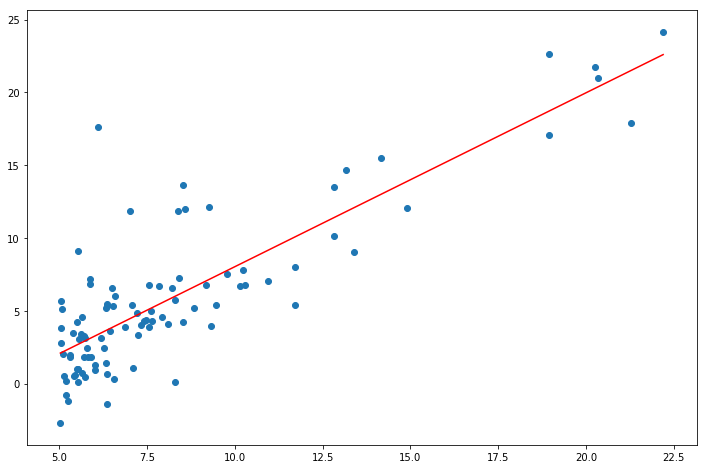

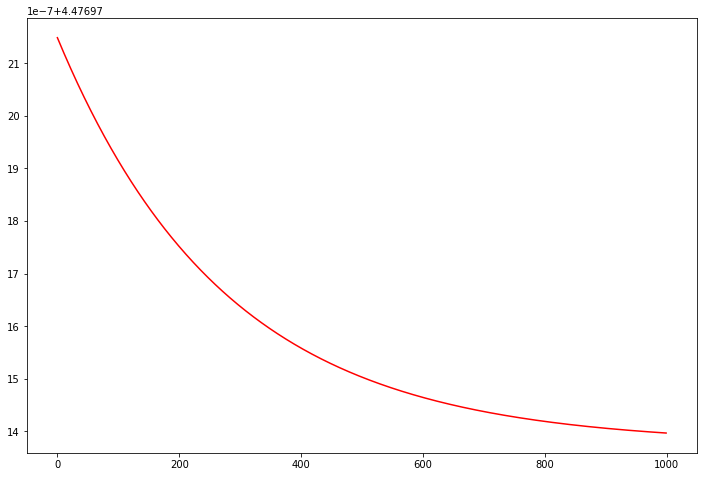

In [192]:
change = 0.01
times  = 1000
gt, cost = gradientDescent(X, Y, theta, change, times)
x = np.linspace(data.Population.min(), data.Population.max(),100)
f = gt[0, 0] + x* gt[0,1]
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(range(times), cost, 'r', label='cost')
plt.show()

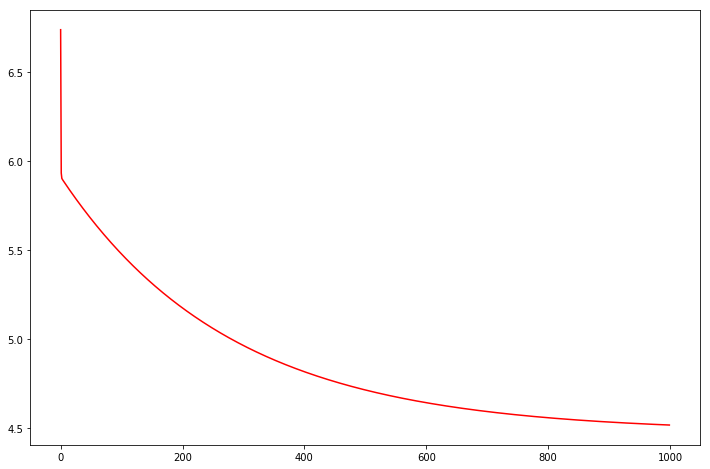

In [132]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(range(times), cost, 'r', label='cost')
plt.show()

In [227]:
changetimes = [1,100,1000]

In [207]:
np.manx(changetimes

1000000

In [200]:
changetimes[1]

In [202]:
test = np.zeros

array([0., 0., 0.])

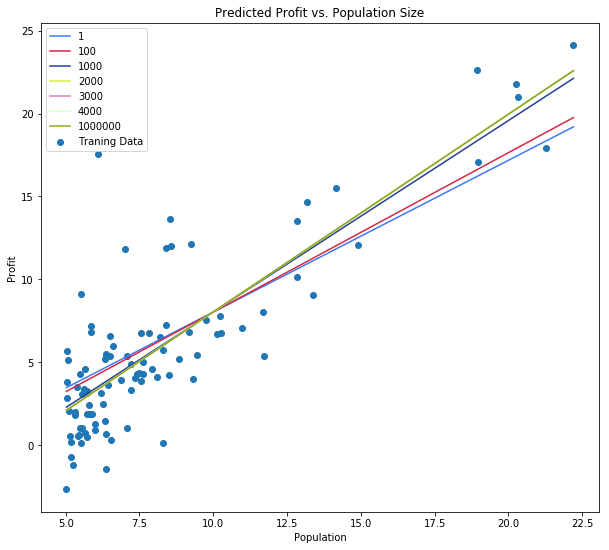

In [218]:

alpha = 0.01
fig,ax = plt.subplots(figsize=(10,9))
ax.scatter(data.Population, data.Profit, label='Traning Data')
x = np.linspace(data.Population.min(), data.Population.max(),100)
for i in range(len(changetimes)):
    theta1 = np.matrix(np.array([0,0]))
    theta, cost = gradientDescent(X, Y, theta, alpha, changetimes[i])
    f = theta[0, 0] + x* theta[0,1]
    ax.plot(x, f, c = randomcolor(), label = str(changetimes[i]))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [290]:
# 训练次数对最终结果的影响
changetimes = range(1,10000,100)
theatar = np.zeros((len(changetimes), theta.shape[1]))
costlist = { changetimes[0]: np.zeros(changetimes[0])}
alpha = 0.01
for i in range(len(changetimes)):
    theatar[i], costlist[changetimes[i]] = gradientDescent(X, Y, np.matrix(np.array([0,0])), alpha, changetimes[i])


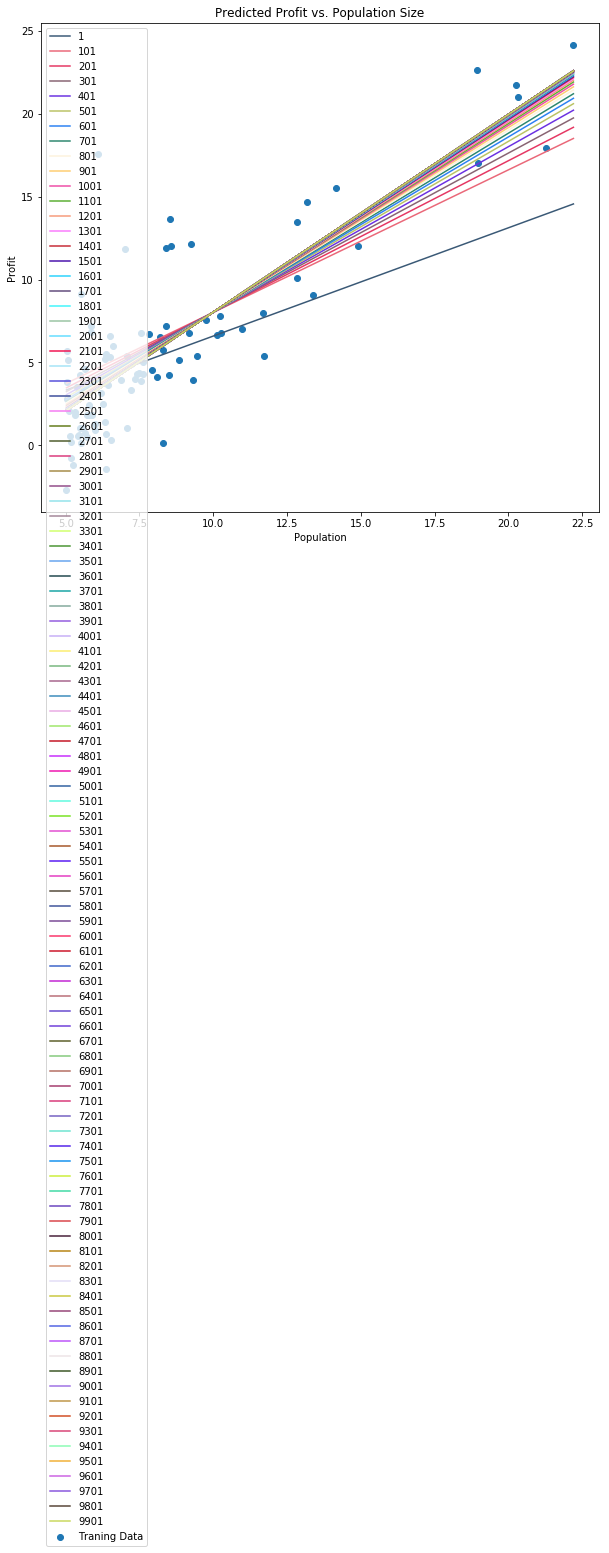

In [291]:
fig,ax = plt.subplots(figsize=(10,9))
ax.scatter(data.Population, data.Profit, label='Traning Data')
x = np.linspace(data.Population.min(), data.Population.max(),100)
for i in range(len(changetimes)):
    f = theatar[i, 0] + x* theatar[i,1]
    ax.plot(x, f, c = randomcolor(), label = str(changetimes[i]))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

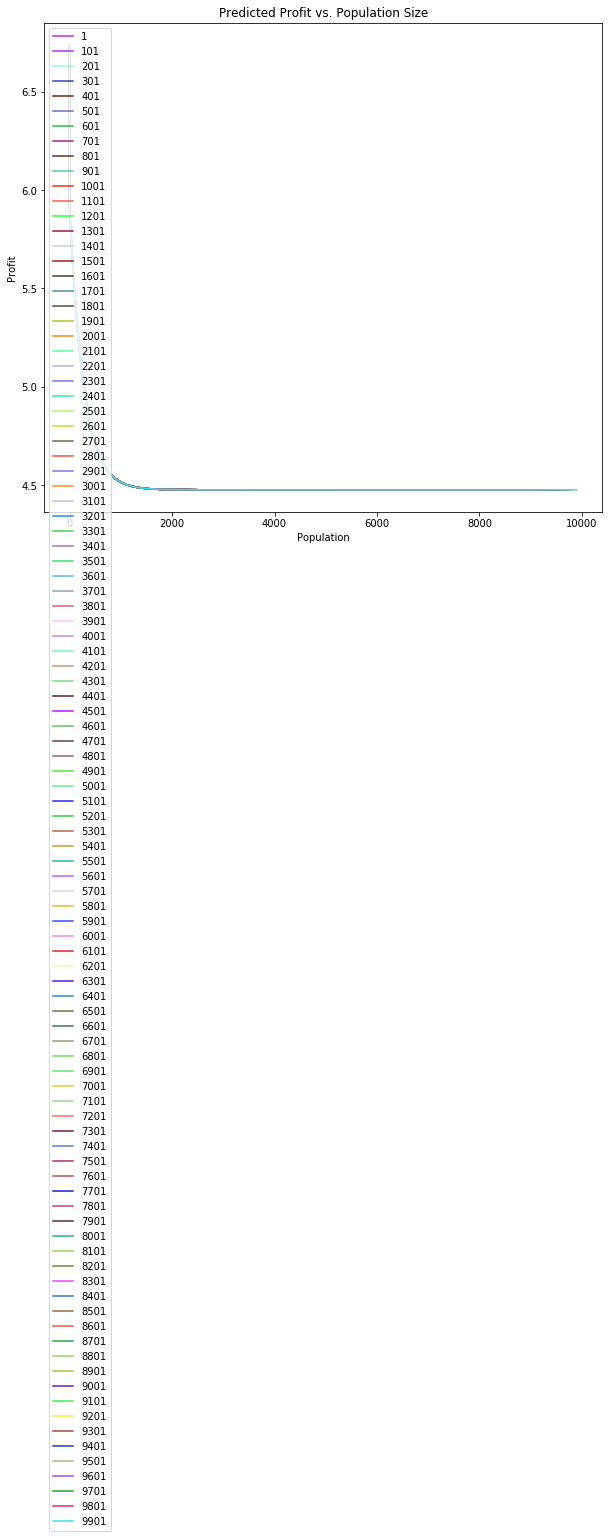

In [292]:
fig,ax = plt.subplots(figsize=(10,9))
for i in range(len(changetimes)):
    ax.plot(range(len(costlist[changetimes[i]])), costlist[changetimes[i]], c = randomcolor(), label = str(changetimes[i]))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

In [309]:
# 训练次数对最终结果的影响
alpha = [10,6,5,4,3,2,1]
costlist = {alpha[0]: np.zeros(4000)}
for i in range(len(alpha)):
    theatar[i], costlist[alpha[i]/1000] = gradientDescent(X, Y, np.matrix(np.array([0,0])), alpha[i]/1000, 4000)

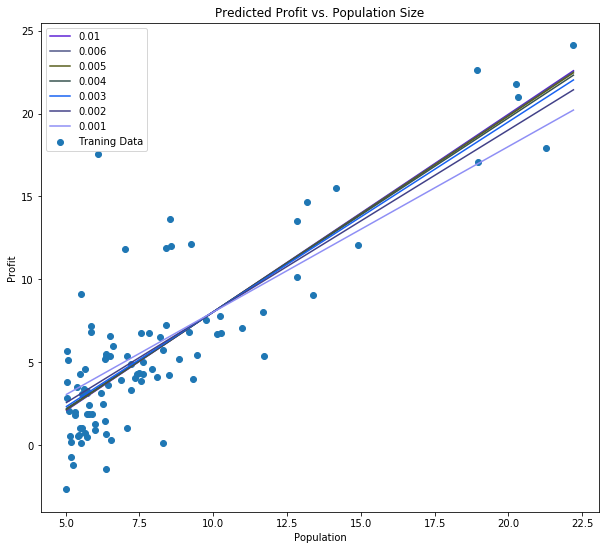

In [310]:
fig,ax = plt.subplots(figsize=(10,9))
ax.scatter(data.Population, data.Profit, label='Traning Data')
x = np.linspace(data.Population.min(), data.Population.max(),100)
for i in range(len(alpha)):
    f = theatar[i, 0] + x* theatar[i,1]
    ax.plot(x, f, c = randomcolor(), label = str(alpha[i]/1000))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

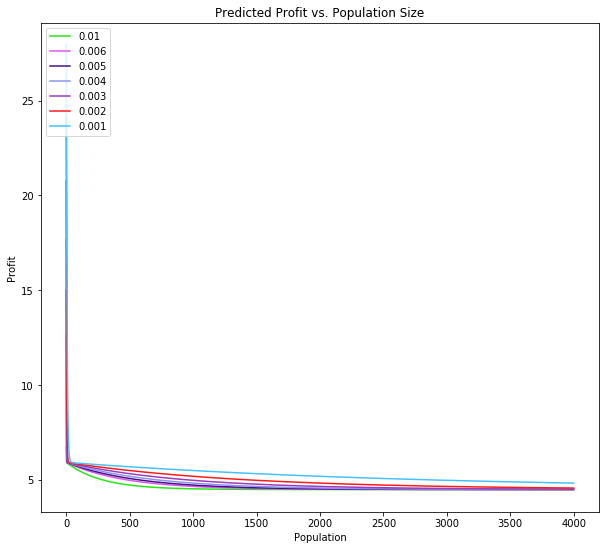

In [311]:
fig,ax = plt.subplots(figsize=(10,9))
for i in range(len(alpha)):
    ax.plot(range(len(costlist[alpha[i]/1000])), costlist[alpha[i]/1000], c = randomcolor(), label = str(alpha[i]/1000))
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()